通过前面的学习，我们已经对数据可视化工具 matplotlib 有一个初步的认知。大家可能也会发现了，matplotlib 提供的函数虽然强大，但是参数太多，要想对图表进行深度的定制就需要修改一系列的参数，这一点对新手并不友好。另一方面，使用 matplotlib 定制的统计图是静态图表，可能在某些需要交互效果的场景下并不合适。为了解决这两个问题，我们为大家介绍两个新的可视化工具，一个是 seaborn，一个是 pyecharts。

### Seaborn

Seaborn 是建立在 matplotlib 之上的数据可视化工具，它相当于是对 matplotlib 进行了更高级的封装，而且 seaborn 也能跟 pandas 无缝整合，让我们可以用更少的代码构建出更好的统计图表，帮助我们探索和理解数据。Seaborn 包含但不局限于以下描述的功能：

1. 面向数据集的 API，可用于检查多个变量之间的关系。
1. 支持使用分类变量来显示观察结果或汇总统计数据。
1. 能够可视化单变量或双变量分布以及在数据子集之间进行比较的选项
1. 各类因变量线性回归模型的自动估计与作图。
1. 集成调色板和主题，轻松定制统计图表的视觉效果。


In [14]:
pip install numpy scipy seaborn

Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'
You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


下面，我们用 seaborn 自带的数据集为例，为大家简单的展示 seaborn 的用法和强大之处，想要深入研究 seaborn 的读者可以自行阅读官方文档和并查看官方作品集中的示例。根据官方示例来编写自己的代码是一个不错的选择，简单的说就是保留官方代码，将数据换成自己的数据即可。下图展示了 seaborn 绘制图表的函数，可以看出，seaborn 的这些函数主要支持我们通过绘制图表来探索数据的关系、分布和分类。

In [11]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'
You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


使用 seaborn，首先需要导入该库并设置主题，代码如下所示。#

In [6]:
import seaborn as sns

sns.set_theme()


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


如果需要在图表上显示中文，还需要用之前讲过的方法修改 matplotlib 的配置参数，代码如下所示。

注意：上面的代码必须放在调用 set_theme 函数之后，否则调用 set_theme 函数时又会重新修改 matplotlib 配置参数中的字体设置。

加载官方数据集Tips（就餐小费数据）

In [5]:
import ssl


ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
tips_df = sns.load_dataset('tips')
tips_df.info()
# 运行结果如下所示，其中 total_bill 表示账单总金额，
# tip 表示小费的金额，sex 是顾客的性别，smoker 表示顾客是否抽样，
# day 代表星期几，time 代表是午餐还是晚餐，size 是就餐人数。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


如果我们希望了解账单金额的分布，可以使用下面的代码来绘制分布图。

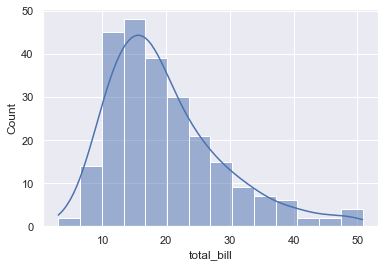

In [4]:
sns.histplot(data=tips_df, x='total_bill', kde=True)

如果想了解变量之间的两两关系，我们可以绘制点对图，代码和效果如下所示。

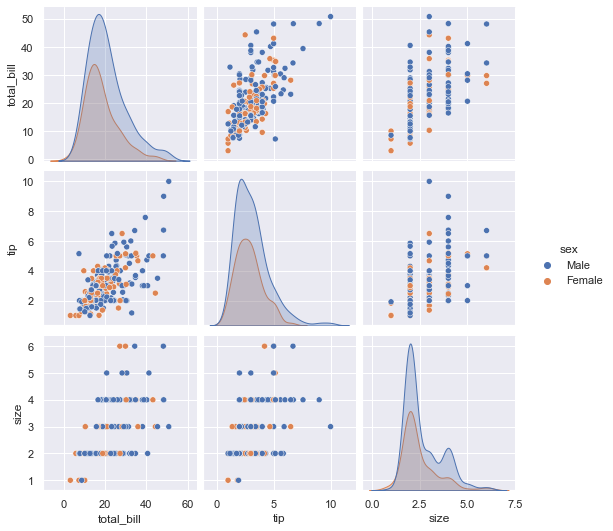

In [6]:
sns.pairplot(data=tips_df, hue = 'sex')

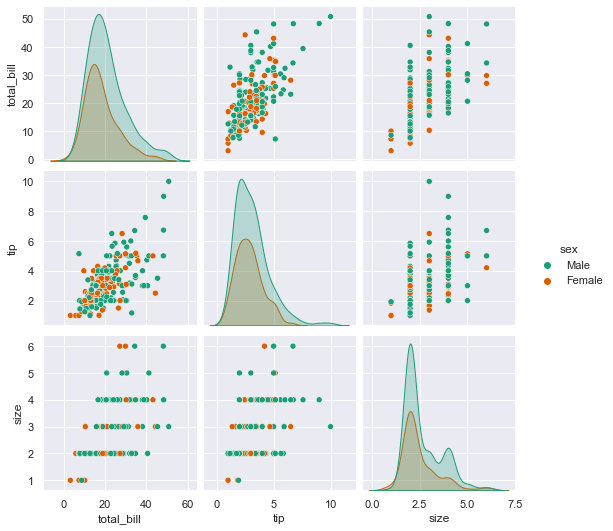

In [8]:
sns.pairplot(data=tips_df, hue='sex',palette='Dark2')

接下来，我们为 total_bill 和 tip 两组数据绘制联合分布图，代码如下所示。

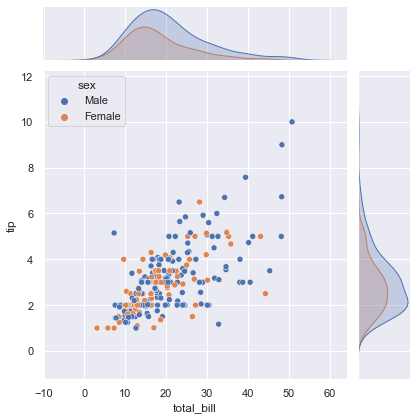

In [10]:
sns.jointplot(data=tips_df, x='total_bill',y='tip',hue='sex')

上面清晰的展示了，total_bill 和 tip 之间存在正相关关系，这一点我们也可以通过 DataFrame 对象的 corr 方法进行验证。接下来，我们可以建立回归模型来拟合这些数据点，而 seaborn 的线性回归模型图已经帮我们实现了这项功能，代码如下所示。

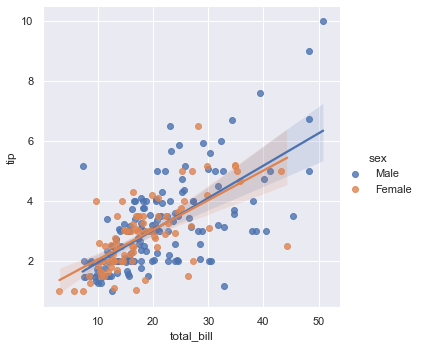

In [12]:
sns.lmplot(data=tips_df, x='total_bill',y='tip',hue='sex')

如果我们希望了解账单金额的集中和离散趋势，可以绘制箱线图或小提琴图，代码如下所示，我们将数据按星期四、星期五、星期六和星期天分别进行展示。

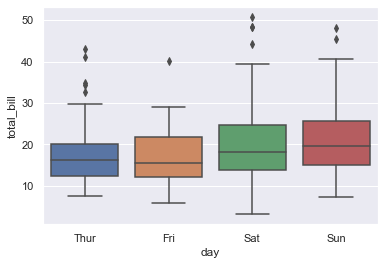

In [15]:
sns.boxplot(data=tips_df, x='day',y='total_bill')

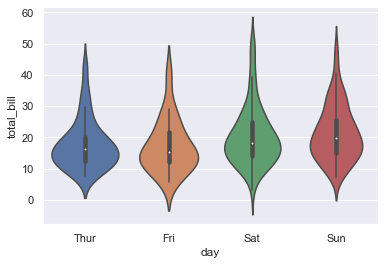

In [20]:
sns.violinplot(data=tips_df, x='day',y='total_bill')

说明：相较于箱线图，小提琴图没有标注异常点而是显示了数据的整个范围，另一方面，小提琴图很好的展示了数据的分布（密度轨迹

## Pyecharts

Echarts 原来是百度开发的一个前端图表库，2018年1月16日，ECharts 进入 Apache Incubator 进行孵化，目前已经是 Apache 软件基金会的顶级项目。凭借着良好的交互性和精巧的图表设计，ECharts 得到了众多开发者的认可，而 pyecharts 就是基于 Python 语言对 ECharts 进行了包装，让 Python 开发者也可以使用 ECharts 绘制外观精美且交互性强的统计图表。

In [24]:
pip install pyecharts

  Using cached pyecharts-1.9.1-py3-none-any.whl (135 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


在jupyter ,可以直接使用魔法指令进行安装
%pip install pyecharts

接下来，我们通过来自于 pyecharts 官方网站新手教程中的一个例子，来认识 pyecharts。当然，我们对官网的例子进行一些调整，代码如下所示。

In [52]:
from pyecharts.charts import Bar
from pyecharts import options
from pyecharts.globals import ThemeType
#创建柱状图对象并设置初始参数（宽度，高度，主题）
bar = Bar(init_opts=options.InitOpts(width='600px',
                                    height='450px',
                                    theme=ThemeType.CHALK))
#设置横坐标
bar.add_xaxis(["衬衫","羊毛衫","雪绒衫","裤子","高跟鞋","袜子"])
#设置纵轴数据(第一组)
bar.add_yaxis(
    "商家A",
    [25,20,36,10,76,90])
#设置纵轴数据(第二组)
bar.add_yaxis("商家B",
             [15,12,30,20,45,60])
#设置纵轴数据(第三组)
bar.add_yaxis("商家C",
              [12, 32, 40, 52, 35, 26]
             )
#添加全局配置参数
bar.set_global_opts(
# 横轴相关参数
    xaxis_opts=options.AxisOpts(
        axislabel_opts=options.LabelOpts(
        color='white')),
    #纵轴相关的参数(标签、最小值、最大值、间隔)
    yaxis_opts=options.AxisOpts(
    axislabel_opts=options.LabelOpts(
        color='white'),
    min_=0,
    max_=100,
    interval=10
    ),
    #标签相关的参数(内容，链接，位置，文本样式)吗
    title_opts=options.TitleOpts(
        title='2021年销售数据展示',
        title_link='http://www.qfedu.com',
        pos_left='2%',
        title_textstyle_opts=options.TextStyleOpts(
            color='white',
            font_size=16,
            font_family='SimHei',
            font_weight='bold'
        )
    ),
    #工具箱相关参数
    toolbox_opts=options.ToolboxOpts(
        orient='vertical',
        pos_left='right'
    )
    )
#在jupyter Notebook中渲染图表
bar.render_notebook()
# bar.render('index.html')

上面代码的运行效果如下图所示。值得一提的是，下图中的标题、图例、右侧的工具箱都是可以点击的，大家可以点击它们看看会有什么样的效果，ECharts 的魅力就在于它的交互效果，大家一定要试一试。如果要将下面的统计图表保存成一个网页，可以将上面最后一行代码修改为bar.render('index.html')即可。

接下来，我们也是通过一个官方示例，看看如何绘制饼图。

In [65]:
import pyecharts.options as opts
from pyecharts.charts import Pie

#准备饼图需要的数据
x_data = ["直接访问","邮箱营销","联盟广告","视频广告","搜索引擎"]
y_data = [335, 310, 234, 135, 1548]
data=[(x,y) for x, y in zip(x_data, y_data)]
#创建饼图对象并设置初始化参数
pie = Pie(init_opts=opts.InitOpts(width="880px",height="400px"))
#向饼图添加数据
pie.add('',
        data_pair=data,
        radius=["50%","75%"],
        label_opts=opts.LabelOpts(is_show=False),
       )
#设置全局配置项
pie.set_global_opts(
    #配置图例相关的参数
    legend_opts=opts.LegendOpts(
    pos_left="legft",
    orient="vertical"
    )
)
#设置数据系列配置参数
pie.set_series_opts(
#设置不显示工具提示
    tooltip_opts=opts.TooltipOpts(is_show=False),
#     设置饼图标签的样式
    label_opts=opts.LabelOpts(formatter="{b}({c}):{d}%")
)
pie.render_notebook()


需要提醒大家注意的是，pyecharts 并不能直接使用 NumPy 的 ndarray 和 Pandas 的 Series、DataFrame 为其提供数据，它需要的是 Python 原生的数据类型。可能大家也注意到了，上面的代码中，我们使用的都是列表、元组这样的数据类型。

最后，我们来看看如何绘制地图，绘制地图首先需要安装额外的依赖库来获取地图相关信息，命令如下所示。

In [ ]:
pip install echarts-countries-pypkg echarts-china-provinces-pypkg echarts-china-cities-pypkg echarts-china-counties-pypkg